In [2]:
import pandas as pd
import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Dataset formatting
* Formatted txt to csv format
* Computed and stored path to image

! Code doesn't need to be run if user has access to the corresponding csv files

In [ ]:
def format_data(path):
    with open(path, 'r') as f:
        stripped_lines = (line.strip() for line in f)
        split_lines = [line.split("\t") for line in stripped_lines if line]

    df = pd.DataFrame(split_lines[1:], columns=split_lines[0])
    df.drop(['x', 'y', 'dx', 'dy', 'tilt_ang', 'fiducial_yaw_angle', 'fiducial_score'], axis=1, inplace=True)
    return df

def get_image_path(idx, df):
    print(idx)
    folder_path = os.path.join(r'dataset\AdienceBenchmarkGenderAndAgeClassification\faces', df['user_id'].iloc[idx], '*.jpg')
    file_path = [file for file in glob.glob(folder_path) if '.' + df['face_id'].iloc[idx] + '.' + df['original_image'].iloc[idx] in file]

    if len(file_path) != 1:
        print(len(file_path))
        print(file_path)
        raise IOError

    return file_path[0]

path = 'dataset/AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt'
df_fold = format_data(path)
list_paths = [get_image_path(idx, df_fold) for idx in range(len(df_fold))]
df_fold['path'] = list_paths

In [15]:
df_fold.drop(['original_image', 'user_id', 'face_id'], axis=1, inplace=True)
df_fold.to_csv("formatted_data_fold4.csv", index=False)

# Check quality of labels

In [102]:
df_fold0 = pd.read_csv('formatted_data_fold0.csv')
df_fold1 = pd.read_csv('formatted_data_fold1.csv')
df_fold2 = pd.read_csv('formatted_data_fold2.csv')
df_fold3 = pd.read_csv('formatted_data_fold3.csv')
df_fold4 = pd.read_csv('formatted_data_fold4.csv')

# combine all folds into one dataframe
df_list = [df_fold0, df_fold1, df_fold2, df_fold3, df_fold4]
df_all = pd.concat(df_list)
df_all.reset_index(inplace=True, drop=True)

Label: (0, 2), m


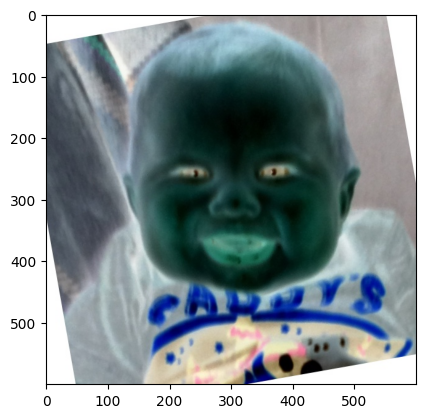

In [119]:
# look at images
def get_image(filepath):
    """
    Read image from path

    :param filepath: path of image
    :return: image
    """
    with open(filepath, 'rb') as f:
        im = plt.imread(f)
    return im

img_id = df_fold2.iloc[80]
im = get_image(img_id['path'])
plt.imshow(~im)
print(f"Label: {img_id['age']}, {img_id['gender']}")

In [10]:
print(f"Gender labels for fold 0: {df_fold0['gender'].unique()}")
print(f"Gender labels for fold 1: {df_fold1['gender'].unique()}")
print(f"Gender labels for fold 2: {df_fold2['gender'].unique()}")
print(f"Gender labels for fold 3: {df_fold3['gender'].unique()}")
print(f"Gender labels for fold 4: {df_fold4['gender'].unique()}")
print(f"Gender labels all: {df_all['gender'].unique()}")

Gender labels for fold 0: ['f' 'm' nan 'u']
Gender labels for fold 1: ['f' 'm' nan 'u']
Gender labels for fold 2: ['m' 'f' 'u' nan]
Gender labels for fold 3: ['m' 'f' nan 'u']
Gender labels for fold 4: ['m' 'u' 'f' nan]
Gender labels all: ['f' 'm' nan 'u']


In [11]:
print(f"Age labels for fold 0: {df_fold0['age'].unique()}")
print(f"Age labels for fold 1: {df_fold1['age'].unique()}")
print(f"Age labels for fold 2: {df_fold2['age'].unique()}")
print(f"Age labels for fold 3: {df_fold3['age'].unique()}")
print(f"Age labels for fold 4: {df_fold4['age'].unique()}")
print(f"Age labels all: {df_all['age'].unique()}")

Age labels for fold 0: ['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36']
Age labels for fold 1: ['(60, 100)' '(48, 53)' '(4, 6)' '45' '13' '(15, 20)' '35' '(8, 12)' '23'
 '55' '(38, 43)' '(25, 32)' '(0, 2)' '22' '(38, 42)' 'None' '(8, 23)'
 '(27, 32)']
Age labels for fold 2: ['(0, 2)' '(38, 43)' '(25, 32)' '(60, 100)' '(4, 6)' '(48, 53)' '(8, 12)'
 '23' 'None' '3' '(15, 20)' '57' '56' '2' '35' '55' '22' '13' '45' '29']
Age labels for fold 3: ['(25, 32)' '(15, 20)' '34' '(38, 43)' '(60, 100)' '57' '35' '42'
 '(8, 12)' '(4, 6)' '(0, 2)' '(38, 42)' 'None' '(48, 53)' '46' '36' '22'
 '23' '58' '3' '(27, 32)' '45' '55']
Age labels for fold 4: ['(4, 6)' '(48, 53)' '(25, 32)' '(0, 2)' '57' '55' '(15, 20)' '(38, 43)'
 '35' '(8, 12)' '(60, 100)' '(38, 48)' '45' 'None' '32']
Age labels all: ['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '

In [103]:
# Step 1: Drop all rows with missing values and gender 'u'
df_all = df_all[df_all.gender != 'u']
df_all.dropna(inplace=True)
df_all = df_all[df_all.age != "None"]
df_all.reset_index(inplace=True, drop=True)

In [104]:
# Step 2: define new non-overlapping age intervals
# (0,2)
# (4,6)
# (8,24)
# (25, 37)
# (38, 48)
# (49, 59)
# (60, 100)

print(f"Age labels all before: {df_all['age'].unique()}")

df_all['age'] = df_all.age.replace({'(0, 2)': '(0, 3)', '(4, 6)': '(4, 7)', '(8, 12)': '(8, 24)', '(8, 23)': '(8, 24)', '(38, 43)': '(38, 48)', '(38, 42)': '(38, 48)', '(27, 32)': '(25, 37)', '(25, 32)': '(25, 37)', '(48, 53)': '(49, 59)', '(15, 20)': '(8, 24)'})

age_dict = {'(0, 3)': (0, 3), '(4, 7)': (4, 7), '(8, 24)': (8, 24), '(25, 37)': (25, 37), '(38, 48)': (38, 48), '(49, 59)': (49, 59), '(60, 100)': (60, 100)}
for idx, row in df_all.iterrows():
    if '(' not in row['age']:
        num = int(row['age'])
        for key, value in age_dict.items():
            if value[0] <= num <= value[1]:
                df_all['age'].iloc[idx] = key

print(f"Age labels all after: {df_all['age'].unique()}")

Age labels all before: ['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' '(38, 48)' '35' '3' '55' '58' '22' '13' '45' '36' '23'
 '(38, 42)' '(8, 23)' '(27, 32)' '57' '2' '29' '34' '42' '46']
Age labels all after: ['(25, 37)' '(38, 48)' '(4, 7)' '(60, 100)' '(8, 24)' '(49, 59)' '(0, 3)']


## Investigate age and gender distribution

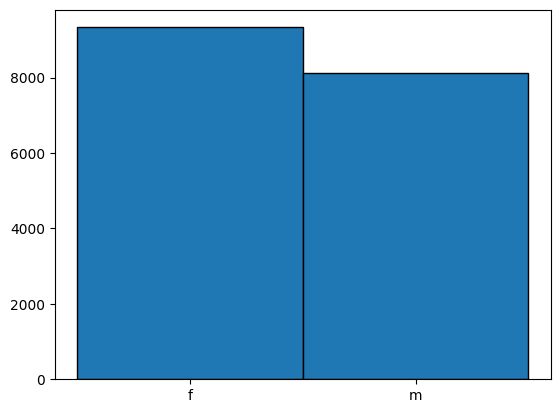

In [115]:
from collections import Counter

count = Counter(list(df_all['gender']))
labels, values = zip(*count.items())


indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, edgecolor = 'black')
plt.xticks(indexes, labels)
plt.show()

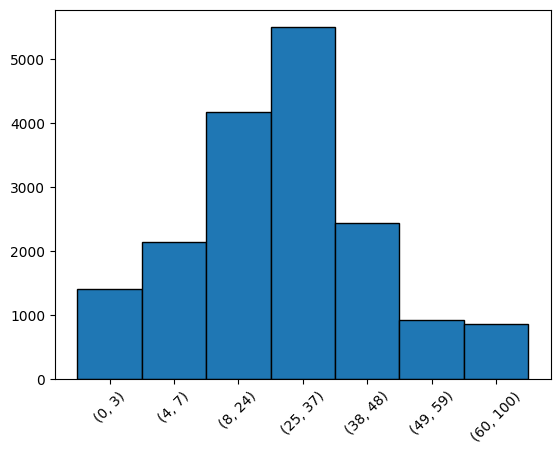

In [113]:
from collections import Counter

count = Counter(list(df_all['age']))
count = dict(sorted(count.items(), key=lambda pair: age_dict[pair[0]][0]))
labels, values = zip(*count.items())


indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, edgecolor = 'black')
plt.xticks(indexes, labels, rotation = 45)
plt.show()

# Train-test Split